# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.dropna(axis=0 , inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12427 non-null  int64  
 1   data_ref               12427 non-null  object 
 2   id_cliente             12427 non-null  int64  
 3   sexo                   12427 non-null  object 
 4   posse_de_veiculo       12427 non-null  bool   
 5   posse_de_imovel        12427 non-null  bool   
 6   qtd_filhos             12427 non-null  int64  
 7   tipo_renda             12427 non-null  object 
 8   educacao               12427 non-null  object 
 9   estado_civil           12427 non-null  object 
 10  tipo_residencia        12427 non-null  object 
 11  idade                  12427 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  12427 non-null  float64
 14  renda                  12427 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

## Carregando pacotes


In [5]:

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

### Análise gráfica

<AxesSubplot:xlabel='sexo', ylabel='renda'>

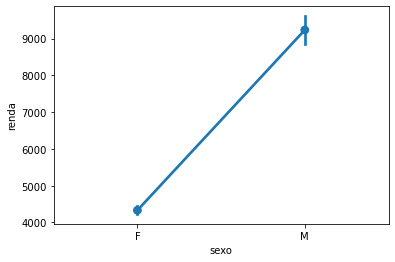

In [6]:
sns.pointplot(y = 'renda', x = 'sexo', data = df)

<AxesSubplot:xlabel='tipo_renda', ylabel='renda'>

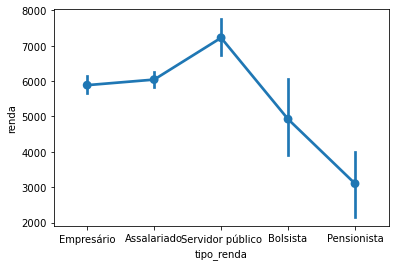

In [7]:
sns.pointplot(y = 'renda', x = 'tipo_renda', data = df)

<AxesSubplot:xlabel='educacao', ylabel='renda'>

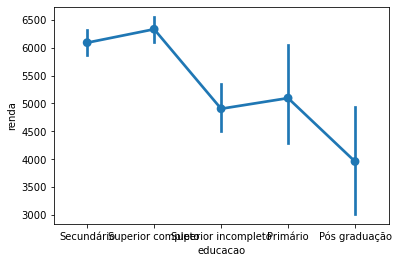

In [8]:
sns.pointplot(y = 'renda', x = 'educacao', data = df)

<AxesSubplot:xlabel='estado_civil', ylabel='renda'>

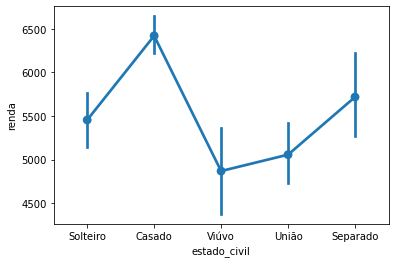

In [9]:
sns.pointplot(y = 'renda', x = 'estado_civil', data = df)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='renda'>

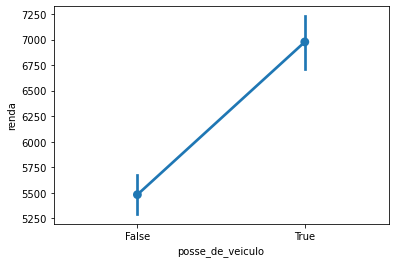

In [10]:
sns.pointplot(y = 'renda', x = 'posse_de_veiculo', data = df)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='renda'>

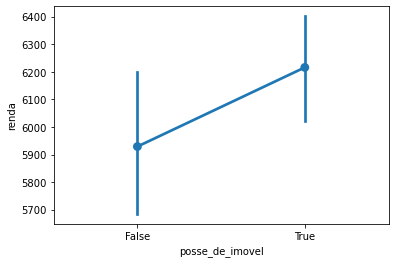

In [11]:
sns.pointplot(y = 'renda', x = 'posse_de_imovel', data = df)

<AxesSubplot:xlabel='tipo_residencia', ylabel='renda'>

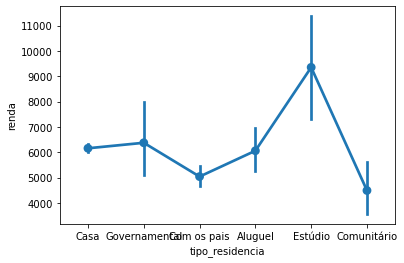

In [12]:
sns.pointplot(y = 'renda', x = 'tipo_residencia', data = df)

### 1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.

In [13]:
y, x = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao,Treatment("Secundário")) +C(estado_civil) + C(tipo_residencia,Treatment("Casa")) + idade + tempo_emprego + qt_pessoas_residencia',data = df)


In [23]:
sm.OLS(y, x).fit()


In [ ]:
###  2. Removendo as variáveis menos significantes 

In [15]:
y, x = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(educacao,Treatment("Secundário")) +C(estado_civil) + C(tipo_residencia,Treatment("Casa")) + idade + tempo_emprego + qt_pessoas_residencia',data = df)
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     336.5
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:47:49   Log-Likelihood:                -13623.
No. Observations:               12427   AIC:                         2.729e+04
Df Residuals:                   12406   BIC:                         2.744e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       6.6172      0.219     30.164      0.000       6.187       7.047
C(sexo)[T.M]                                                    0.7790      0.015     53.021      0.000       0.750       0.808
posse_de_veiculo[T.True]                                        0.0459      0.014      3.232      0.001       0.018       0.074
posse_de_imovel[T.True]                                         0.0839      0.014      5.975      0.000       0.056       0.111
C(educacao, Treatment("Secundário"))[T.Primário]               -0.0001      0.072     -0.002      0.999      -0.142       0.142
C(educacao, Treatment("Secundário"))[T.Pós graduação]           0.1559      0.143      1.092      0.275      -0.124       0.436
C(educacao, Treatment("Secundário"))[T.Superior completo]       0.1209      0.014      8.732      0.000       0.094       0.148
C(educacao, Treatment("Secundário"))[T.Superior incompleto]    -0.0188      0.032     -0.582      0.561      -0.082       0.045
C(estado_civil)[T.Separado]                                     0.3141      0.112      2.812      0.005       0.095       0.533
C(estado_civil)[T.Solteiro]                                     0.2587      0.109      2.365      0.018       0.044       0.473
C(estado_civil)[T.União]                                       -0.0261      0.025     -1.034      0.301      -0.076       0.023
C(estado_civil)[T.Viúvo]                                        0.3446      0.116      2.969      0.003       0.117       0.572
C(tipo_residencia, Treatment("Casa"))[T.Aluguel]                0.0440      0.054      0.810      0.418      -0.063       0.151
C(tipo_residencia, Treatment("Casa"))[T.Com os pais]            0.0062      0.030      0.210      0.834      -0.052       0.064
C(tipo_residencia, Treatment("Casa"))[T.Comunitário]           -0.0990      0.091     -1.084      0.278      -0.278       0.080
C(tipo_residencia, Treatment("Casa"))[T.Estúdio]                0.1354      0.084      1.608      0.108      -0.030       0.300
C(tipo_residencia, Treatment("Casa"))[T.Governamental]         -0.0112      0.039     -0.286      0.775      -0.088       0.066
qtd_filhos                                                     -0.2559      0.108     -2.361      0.018      -0.468      -0.043
idade                                                           0.0051      0.001      6.347      0.000       0.004       0.007
tempo_emprego                                                   0.0609      0.001     59.087      0.000       0.059       0.063
qt_pessoas_residencia                                           0.2782      0.108      2.571      0.010       0.066       0.490
===========

In [16]:
y, x = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(estado_civil) + C(tipo_residencia,Treatment("Casa")) + idade + tempo_emprego + qt_pessoas_residencia',data = df)
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     412.9
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:47:50   Log-Likelihood:                -13664.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12410   BIC:                         2.749e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  6.6983      0.220     30.484      0.000       6.268       7.129
C(sexo)[T.M]                                               0.7696      0.015     52.364      0.000       0.741       0.798
posse_de_veiculo[T.True]                                   0.0562      0.014      3.961      0.000       0.028       0.084
posse_de_imovel[T.True]                                    0.0868      0.014      6.166      0.000       0.059       0.114
C(estado_civil)[T.Separado]                                0.3096      0.112      2.763      0.006       0.090       0.529
C(estado_civil)[T.Solteiro]                                0.2529      0.110      2.305      0.021       0.038       0.468
C(estado_civil)[T.União]                                  -0.0294      0.025     -1.162      0.245      -0.079       0.020
C(estado_civil)[T.Viúvo]                                   0.3333      0.116      2.863      0.004       0.105       0.562
C(tipo_residencia, Treatment("Casa"))[T.Aluguel]           0.0361      0.055      0.662      0.508      -0.071       0.143
C(tipo_residencia, Treatment("Casa"))[T.Com os pais]       0.0057      0.030      0.193      0.847      -0.052       0.064
C(tipo_residencia, Treatment("Casa"))[T.Comunitário]      -0.0616      0.091     -0.675      0.500      -0.241       0.117
C(tipo_residencia, Treatment("Casa"))[T.Estúdio]           0.1525      0.084      1.806      0.071      -0.013       0.318
C(tipo_residencia, Treatment("Casa"))[T.Governamental]    -0.0211      0.039     -0.536      0.592      -0.098       0.056
qtd_filhos                                                -0.2452      0.109     -2.255      0.024      -0.458      -0.032
idade                                                      0.0046      0.001      5.766      0.000       0.003       0.006
tempo_emprego                                              0.0610      0.001     59.037      0.000       0.059       0.063
qt_pessoas_residencia                                      0.2684      0.109      2.473      0.013       0.056       0.481
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.300
Skew:                           0.024   Prob(JB):                        0.522
Kurtosis:                       3.014   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This

In [17]:
y, x = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_residencia,Treatment("Casa")) + idade + tempo_emprego + qt_pessoas_residencia',data = df)
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     549.1
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:47:50   Log-Likelihood:                -13670.
No. Observations:               12427   AIC:                         2.737e+04
Df Residuals:                   12414   BIC:                         2.746e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  7.2354      0.044    163.190      0.000       7.149       7.322
C(sexo)[T.M]                                               0.7676      0.015     52.408      0.000       0.739       0.796
posse_de_veiculo[T.True]                                   0.0566      0.014      4.001      0.000       0.029       0.084
posse_de_imovel[T.True]                                    0.0866      0.014      6.157      0.000       0.059       0.114
C(tipo_residencia, Treatment("Casa"))[T.Aluguel]           0.0326      0.055      0.597      0.550      -0.074       0.139
C(tipo_residencia, Treatment("Casa"))[T.Com os pais]       0.0054      0.030      0.184      0.854      -0.053       0.063
C(tipo_residencia, Treatment("Casa"))[T.Comunitário]      -0.0587      0.091     -0.643      0.520      -0.238       0.120
C(tipo_residencia, Treatment("Casa"))[T.Estúdio]           0.1503      0.084      1.780      0.075      -0.015       0.316
C(tipo_residencia, Treatment("Casa"))[T.Governamental]    -0.0192      0.039     -0.488      0.626      -0.096       0.058
qtd_filhos                                                 0.0330      0.019      1.698      0.090      -0.005       0.071
idade                                                      0.0050      0.001      6.384      0.000       0.003       0.007
tempo_emprego                                              0.0609      0.001     58.974      0.000       0.059       0.063
qt_pessoas_residencia                                     -0.0086      0.016     -0.529      0.597      -0.041       0.023
==============================================================================
Omnibus:                        1.242   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.213
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.021   Cond. No.                         596.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y, x = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia',data = df)
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     940.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:47:50   Log-Likelihood:                -13672.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12419   BIC:                         2.742e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.2377      0.043    166.875      0.000       7.153       7.323
C(sexo)[T.M]                 0.7694      0.015     52.676      0.000       0.741       0.798
posse_de_veiculo[T.True]     0.0569      0.014      4.022      0.000       0.029       0.085
posse_de_imovel[T.True]      0.0866      0.014      6.275      0.000       0.060       0.114
qtd_filhos                   0.0338      0.019      1.735      0.083      -0.004       0.072
idade                        0.0049      0.001      6.408      0.000       0.003       0.006
tempo_emprego                0.0610      0.001     59.075      0.000       0.059       0.063
qt_pessoas_residencia       -0.0092      0.016     -0.566      0.572      -0.041       0.023
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.213
Skew:                           0.022   Prob(JB):                        0.545
Kurtosis:                       3.019   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y, x = patsy.dmatrices('np.log(renda) ~ C(sexo) + posse_de_veiculo + posse_de_imovel + idade + tempo_emprego + qt_pessoas_residencia',data = df)
modelo = sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1097.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:47:50   Log-Likelihood:                -13674.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.741e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.2045      0.039    185.009      0.000       7.128       7.281
C(sexo)[T.M]                 0.7681      0.015     52.652      0.000       0.740       0.797
posse_de_veiculo[T.True]     0.0552      0.014      3.914      0.000       0.028       0.083
posse_de_imovel[T.True]      0.0871      0.014      6.312      0.000       0.060       0.114
idade                        0.0048      0.001      6.231      0.000       0.003       0.006
tempo_emprego                0.0610      0.001     59.126      0.000       0.059       0.063
qt_pessoas_residencia        0.0161      0.007      2.228      0.026       0.002       0.030
==============================================================================
Omnibus:                        1.250   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.222
Skew:                           0.022   Prob(JB):                        0.543
Kurtosis:                       3.020   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='tempo_emprego', ylabel='res_log'>

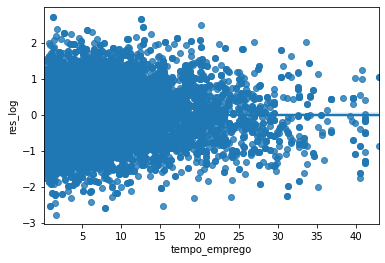

In [20]:
df['res_log'] = modelo.resid

sns.regplot(x='tempo_emprego', y='res_log', data = df)

<AxesSubplot:xlabel='idade', ylabel='res_log'>

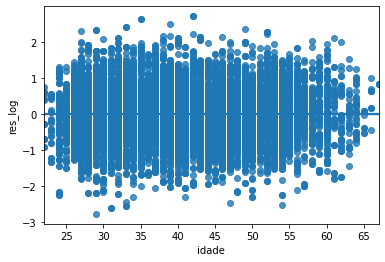

In [21]:
df['res_log'] = modelo.resid

sns.regplot(x='idade', y='res_log', data = df)

O ultimo modelo é o melhor , com base nos erros e no P-value de cada variavel do modelo.
